## Resampling methods: 
### Refit of model of interest to samples formed from the training set, this can obtain additional information about the fitted model 

### 3 methods: Cross-Validation, Bootstraping and Jackknife <br/>
#### Provide estimates of test-set prediction error, and st. dev. and bias of parametric estimates of parametric models<br/>
Test Error: the average error that results from using a ML model to predict the response on a unseen observation(can't be 0 bc model flexibility) -real world performance <br/>

Training error: easy to calculate, estimate easily how well your model perform on the training set

In [1]:
from numpy import random
from IPython.display import Image
import numpy as np

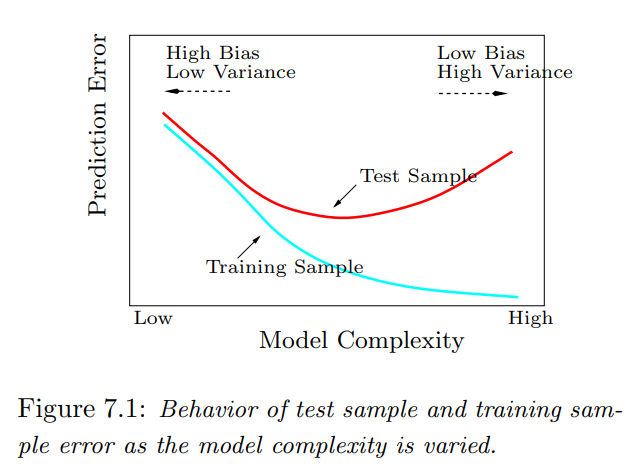

In [2]:
# bias variace trade off: higher epoches lead to more fitted model(overfitted)
Image(filename='pictures/1.png')

#### Idea: how do you estimate this test error for unseen data?
possible solution: work with supar large data set, covers large range of all features of the data **(not necessarily practical in real life)**

## Resampling Method #1: Cross Validation

### Validation-Set Approach
randomly divide a dataset into 2 parts:
1. training set
2. Validation or hold out set

The model is fit on the training set, and the fitted model is used to predict the responses in the validation set<br />

The resulting validation set error is the estimate of the test set error(test MSE, test set classification error)

#### Validation Process:
randomly splitting into 2 halves, left part is the training set and right part is the test set

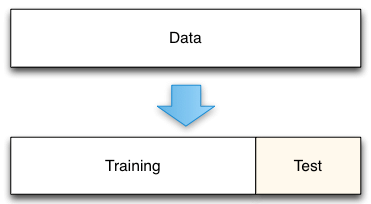

In [3]:
Image(filename='pictures/2.png')

#### Drawbacks of a validation set approach(randomly spliting train and test):
Drawbacks to what you have been doing so far,
1. Estimate we get from the test set can be highly variable(highly dependent on how we split data) -> common random seed<br/>

    over estimated test error from this approach, where the error in one train-test split is much worse than it actually is<br/>


## k fold cross validation: 
#### Randomly divide the dataset into K equal size parts, leave out part k, fit the model to the other K-1 parts, then we obtain prediction on the left out kth part(an improvement on the standard train test split approach, k-fold CV: widely used approach for estimating the test set error)


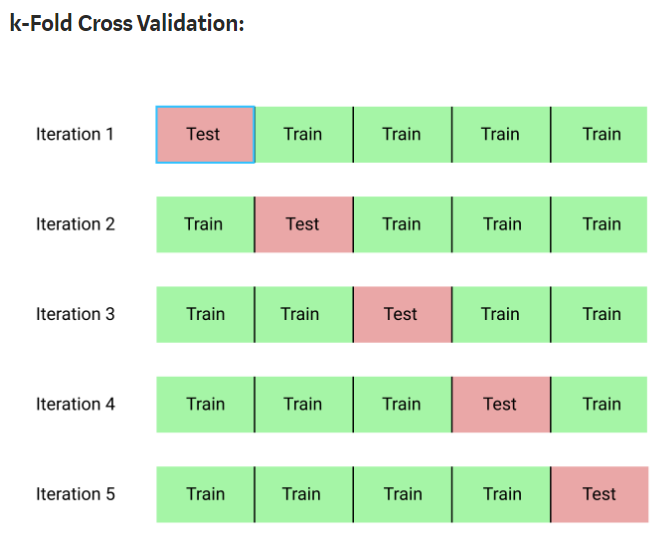

In [4]:
# 5 fold cross validation(K=5)
# train on green and test on red for each iteration
Image(filename='pictures/3.png')

let K parts be c1, c2, ..., cK, where cK denote the indeces of the observation in part K, there are nk observation in part k, then:

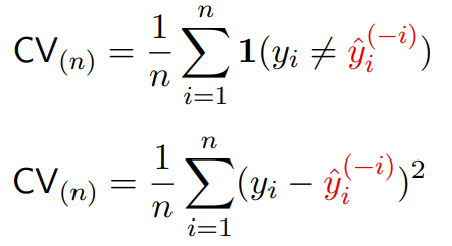

In [5]:
Image(filename='pictures/5.png')
# Cross validation error

#### special case of CV:
if you set **K(number of folds) = n(total observations)**: 
## Leave one out cross validation = LOOCV 
#### issues with leave one out CV:
1. computational expansive
2. LOOCV doesn't "shake up" the data enough => estimates we get from each fold can be correlated => average can have a high variance due to correlated observations. **better choice would be k=5,10. This comes from biase variance trade-off**


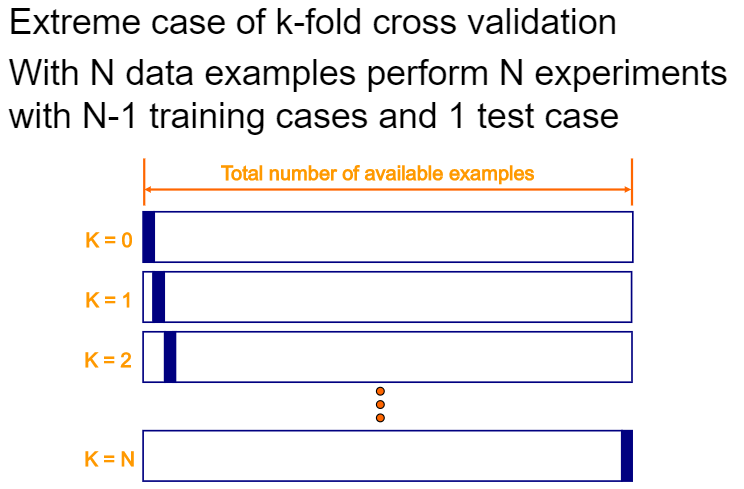

In [6]:
Image(filename='pictures/4.png')

### Resampling Method #2: Bootstrap
### Generating "new data" from existing data, obtain distinct dataset by repeastedly sampling observations from the original dataset with replacement(some observation will appear more than once in the bootstrap sample)
#### Bootstraped data sets are of the same size as the original dataset
#### Powerful and flexible tool and it's not only used in ML/DS, but it's used in statistical applications in all fields(economics, social science, ect.)
used to quantify the uncertainty associated with a given parameter of a ML method. <br/>
for example: Linear regression* <br/>
*the betas associated with the equation below are estimates of the parameter for the linear regression model*
the betas are variable estimates because they depened  on the data, and there is a confidence interval associated to each parameter estimate.(for example: various splits can yield various accuracy) 
   

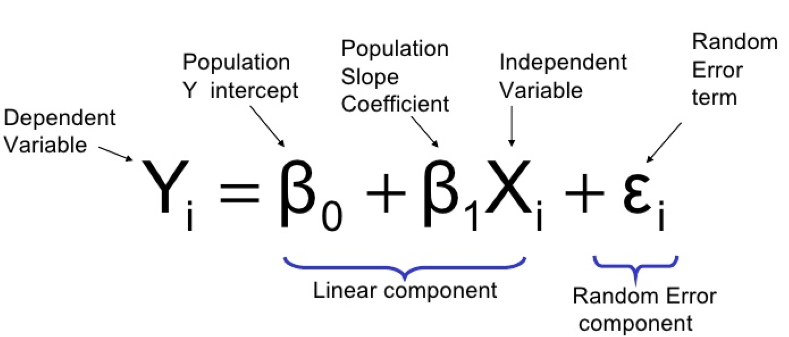

In [7]:
Image(filename='pictures/6.png')

### Example 2: Probability distribution fitting(gaussian)
#### fitting a probability density function, where the two parameters $\mu$ and $\sigma$
depending how you split the data, these two estimates will vary

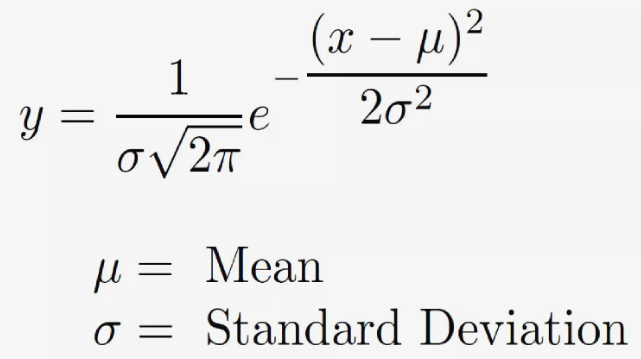

In [8]:
Image(filename='pictures/7.png')

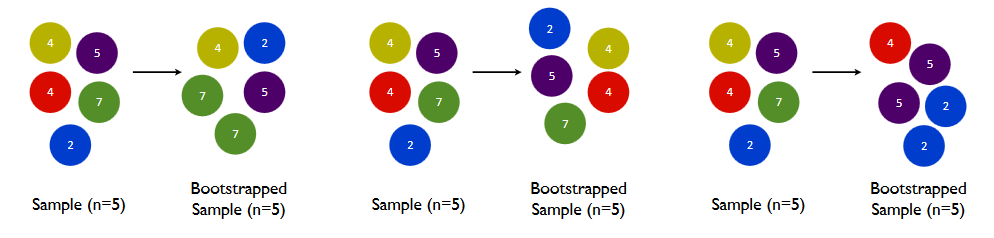

In [9]:
Image(filename='pictures/9.png')

### Resampling Method #3: Jackknife Estimation
### Generating "new data" from existing data, it's used to estimate the uncertainty of a value computed on a dataset
#### New dataset is created by omitting each sample from one new set, this means we get N new sets if we have N samples, each new set has N-1 samples

##### Example below: finding the mean for the dataset

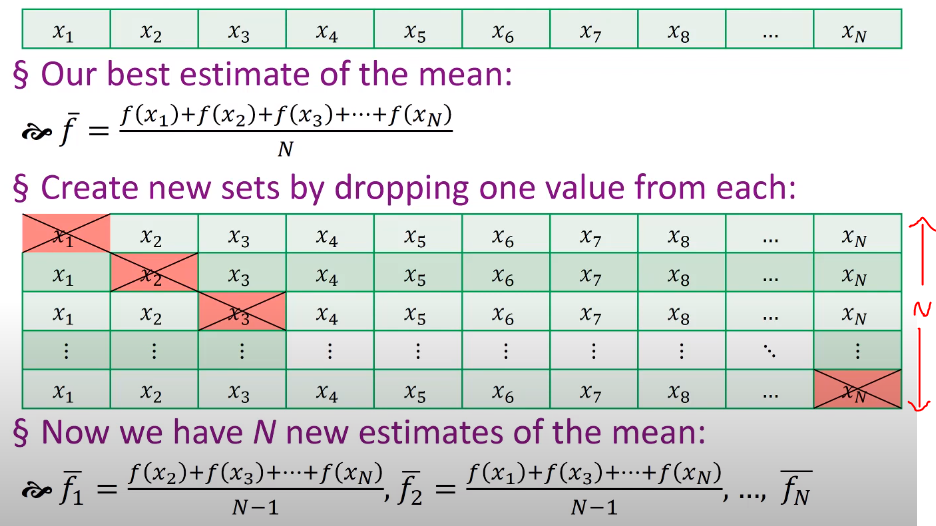

In [10]:
Image(filename='pictures/8.png')

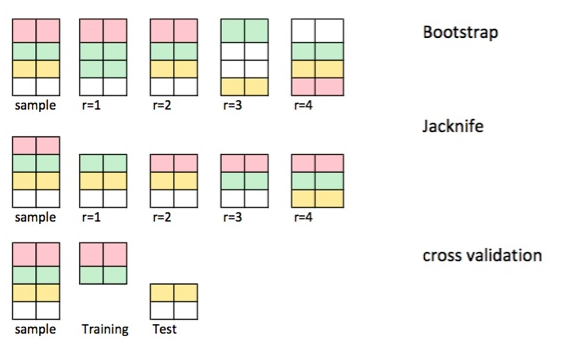

In [11]:
Image(filename='pictures/10.png')

# Questions to check if we understood

#### Suppose that you obtain a bootstrap sample from a set of n observations. (Recall, this means that the sample also must have n observations by definition).
1. What is the probability that the first bootstrap observation is not the jth
observation from the original sample?
2. What is the probability that the second bootstrap observation is not the jth
observation from the original sample?
3. Show that the probability that the jth observation is not in the bootstrap
sample is (1- 1/n)^n.
4. Evaluate the aforementioned probability for n = 5, 10, 100, 10000, what does
this probability converge to for large n? (Hint: You should obtain a beautiful
and familiar result!)

Q1. Since we are selecting randomly, the probability that the jth observation is the first bootstrap sample is 1/n, so the probability that the jth observation is not the first bootstrap sample is (1 - 1/n), which is (n-1)/n.

Q2.Since we sample with replacement, the probability that the jth observation is the second bootstrap sample is 1/n, so the probability that the jth observation is not the second bootstrap sample is (1-1/n) , which is (n-1)/n.

Q3. To generate new dataset with bootstrap, we randomly sample our original dataset with replacement, that means each observation has 1/n probability of getting selected per observation sample. The new dataset is of size n, that means
the jth observation from our original dataset has (1/n) probability of getting selected for our bootstrap sample, and jth observation has (1/n) chance to get selected for the second observation for the new sample, same for nth observation for the new sample. Because the probability for each sample is independent, probability(Observation j is not the first bootstrap observation, Observation j is not the second bootstrap observation, …, Observation j is not the nth bootstrap observation) = Probability(Observation j is not the first bootstrap observation) * Probability(Observation j is not the second bootstrap observation) * … * Probability(Observation j is not the nth bootstrap observation) which equals to (1-1/n)^n.

In [14]:
#Q4 Evaluate the aforementioned probability for n = 5, 10, 100, 10000 
n_list = [5, 10, 100, 10_000]

def chance(num):
    num = (1-1/num)**num
    return num
Prob = []
for i in n_list:
    Prob.append(chance(i))
    print("When n is:", i, "          The probability is:", chance(i))

When n is: 5           The probability is: 0.3276800000000001
When n is: 10           The probability is: 0.3486784401000001
When n is: 100           The probability is: 0.3660323412732292
When n is: 10000           The probability is: 0.36786104643297046


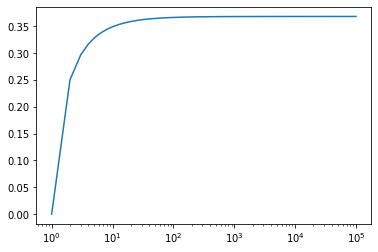

In [16]:
#Q4 Continued. what does this probability converge to for large n? 
import matplotlib.pyplot as plt
n_list = range(1,100_000)
def chance(num):
    num = (1-1/num)**num
    return num
Prob = []
for i in n_list:
    Prob.append(chance(i))
plt.plot(n_list, Prob)
plt.xscale("log")

#### The limit of (1 - 1/n)^n as n goes to infinity is exp(-1); so as n gets larger we see (1 - 1/n)^n approach 1 - exp(-1), which is approximately equal to 0.36781.